In [1]:
# For Analysis
import pandas as pd

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('final_horse.csv')
df.head(3)

,Unnamed: 0,Position,HorseNumber,HorseName,Jockey,Trainer,ActWeightIncr,HorseWeight,GatePosition,WinningMargin,...,CourseState,Course,PrizeMoney,Rating,Gold,Silver,Bronze,TotalMatches,WinRate,BirthPlace
0,0,1,11.0,我跑得 (CJ031),鄭雨滇,何良,114,981,10,-,...,好地,"草地 - ""A"" 賽道",1407400.0,12.0,2.0,6.0,3.0,36.0,0.305556,紐西蘭\r
1,1,2,8.0,名利好 (CH144),都爾,胡森,121,956,9,頸位,...,好地,"草地 - ""A"" 賽道",457200.0,28.0,0.0,2.0,2.0,24.0,0.166667,英國\r
2,2,3,6.0,龍子 (CJ204),韋達,霍利時,125,1009,6,2,...,好地,"草地 - ""A"" 賽道",1000238.0,20.0,2.0,0.0,5.0,36.0,0.194444,紐西蘭\r


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74902 entries, 0 to 74901
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     74902 non-null  int64  
 1   Position       74902 non-null  object 
 2   HorseNumber    74151 non-null  float64
 3   HorseName      74902 non-null  object 
 4   Jockey         74902 non-null  object 
 5   Trainer        74902 non-null  object 
 6   ActWeightIncr  74902 non-null  int64  
 7   HorseWeight    74902 non-null  object 
 8   GatePosition   74902 non-null  object 
 9   WinningMargin  74902 non-null  object 
 10  FinishTime     74902 non-null  object 
 11  WinOdds        74902 non-null  object 
 12  Contenders     74902 non-null  int64  
 13  URL            74902 non-null  object 
 14  Distance       74902 non-null  int64  
 15  CourseState    74902 non-null  object 
 16  Course         74902 non-null  object 
 17  PrizeMoney     74820 non-null  float64
 18  Rating

In [4]:
df.describe()

,Unnamed: 0,HorseNumber,ActWeightIncr,Contenders,Distance,PrizeMoney,Rating,Gold,Silver,Bronze,TotalMatches,WinRate
count,74902.000000,74151.00000,74902.000000,74902.000000,74902.000000,7.482000e+04,74820.000000,74820.000000,74820.000000,74820.000000,74820.000000,74820.000000
mean,37450.500000,6.59921,123.194040,12.336012,1407.880297,3.067270e+06,49.388385,2.825501,2.966613,3.017094,35.423256,0.237908
std,21622.489269,3.56622,6.245749,1.183125,358.307525,3.110400e+06,21.945842,2.108384,2.433144,2.499675,18.173453,0.122086
min,0.000000,1.00000,103.000000,6.000000,1000.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18725.250000,4.00000,119.000000,12.000000,1200.000000,1.226125e+06,33.000000,1.000000,1.000000,1.000000,22.000000,0.166667
50%,37450.500000,7.00000,123.000000,12.000000,1200.000000,2.514550e+06,48.000000,3.000000,3.000000,3.000000,34.000000,0.238095
75%,56175.750000,10.00000,128.000000,13.000000,1650.000000,4.130894e+06,64.000000,4.000000,4.000000,4.000000,46.000000,0.305556
max,74901.000000,14.00000,135.000000,16.000000,2200.000000,8.349190e+07,132.000000,17.000000,17.000000,17.000000,119.000000,1.000000


In [5]:
df.describe(include = ["O"])

,Position,HorseName,Jockey,Trainer,HorseWeight,GatePosition,WinningMargin,FinishTime,WinOdds,URL,CourseState,Course,BirthPlace
count,74902,74902,74902,74902,74902,74902,74902,74902,74902,74902,74902,74902,74820
unique,37,6826,163,52,441,15,253,4647,753,6826,7,7,29
top,1,金紫荊 (CK123),潘頓,方嘉柏,---,3,-,---,10.0,/racing/information/Chinese/Horse/Horse.aspx?H...,好地,"草地 - ""C"" 賽道",澳洲\r
freq,6118,70,4641,4589,1356,6121,6150,1494,2130,70,56031,18791,29068


## Processing

In [6]:
# Finding the duplicated value, if 0 means nothing is duplicated
df[df.duplicated()].shape[0]

0

<Axes: >

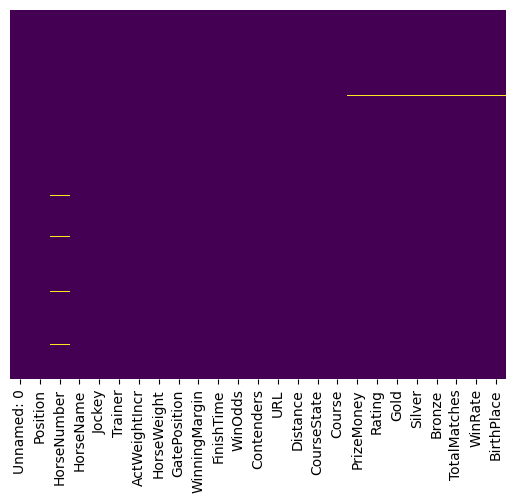

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
# Drop features that do are not needed for future analysis, features that we only get after the race 
df.drop([f"{df.columns[0]}","HorseNumber","HorseName", "Jockey", "Trainer", "FinishTime", "URL"], axis=1, inplace=True)

In [9]:
df.head(3)

,Position,ActWeightIncr,HorseWeight,GatePosition,WinningMargin,WinOdds,Contenders,Distance,CourseState,Course,PrizeMoney,Rating,Gold,Silver,Bronze,TotalMatches,WinRate,BirthPlace
0,1,114,981,10,-,2.7,12,1650,好地,"草地 - ""A"" 賽道",1407400.0,12.0,2.0,6.0,3.0,36.0,0.305556,紐西蘭\r
1,2,121,956,9,頸位,12.0,12,1650,好地,"草地 - ""A"" 賽道",457200.0,28.0,0.0,2.0,2.0,24.0,0.166667,英國\r
2,3,125,1009,6,2,4.5,12,1650,好地,"草地 - ""A"" 賽道",1000238.0,20.0,2.0,0.0,5.0,36.0,0.194444,紐西蘭\r


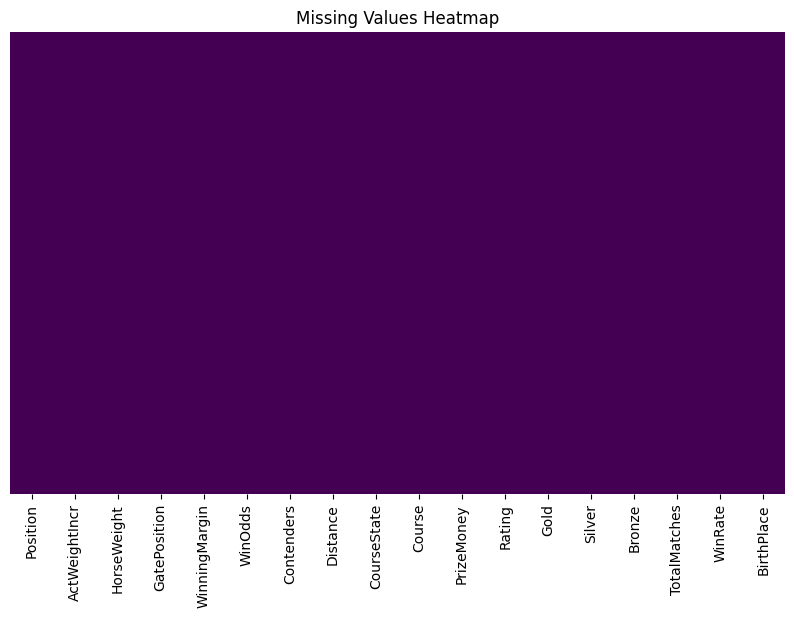

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# Dropping all rows with any missing values
df = df.dropna()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74820 entries, 0 to 74901
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Position       74820 non-null  object 
 1   ActWeightIncr  74820 non-null  int64  
 2   HorseWeight    74820 non-null  object 
 3   GatePosition   74820 non-null  object 
 4   WinningMargin  74820 non-null  object 
 5   WinOdds        74820 non-null  object 
 6   Contenders     74820 non-null  int64  
 7   Distance       74820 non-null  int64  
 8   CourseState    74820 non-null  object 
 9   Course         74820 non-null  object 
 10  PrizeMoney     74820 non-null  float64
 11  Rating         74820 non-null  float64
 12  Gold           74820 non-null  float64
 13  Silver         74820 non-null  float64
 14  Bronze         74820 non-null  float64
 15  TotalMatches   74820 non-null  float64
 16  WinRate        74820 non-null  float64
 17  BirthPlace     74820 non-null  object 
dtypes: float64(

In [12]:
def show_unique_values(name):
        unique_values = df[name].unique()
        print(f"Unique values in column '{name}':")
        print(unique_values)

def show_non_numeric_unique_values(name):
    unique_values = df[name].unique()
    non_numeric_values = [val for val in unique_values if not isinstance(val, (int, float))]
    print(f"Unique non-numeric values in column '{name}':")
    print(non_numeric_values)

# Display unique values for each column
for column in df.columns:
    show_unique_values(column)

Unique values in column 'Position':
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' 'WX' 'WV' '13' '14'
 'PU' '5 平頭馬' 'TNP' 'WV-A' 'FE' '7 平頭馬' 'UR' '3 平頭馬' 'WX-A' '6 平頭馬'
 '4 平頭馬' '8 平頭馬' '10 平頭馬' '1 平頭馬' 'DNF' '2 平頭馬' 'DISQ' '9 平頭馬' 'WXNR'
 '11 平頭馬' '12 平頭馬']
Unique values in column 'ActWeightIncr':
[114 121 125 129 133 123 104 122 126 120 118 130 113 117 124 132 131 109
 119 128 116 127 111 112 115 110 108 107 106 105 103 134 135]
Unique values in column 'HorseWeight':
['981' '956' '1009' '1165' '1146' '1024' '1125' '1096' '1123' '1190'
 '1166' '1155' '1161' '1148' '1113' '1120' '1141' '1263' '1174' '998'
 '1172' '1117' '---' '1057' '1149' '1041' '1061' '1079' '1193' '1110'
 '1136' '1185' '1007' '1143' '1101' '1040' '986' '948' '1102' '1056'
 '1003' '1038' '1050' '1137' '1076' '1216' '1156' '1157' '1135' '1064'
 '1090' '1098' '1150' '1072' '1138' '1039' '1171' '1094' '1085' '1179'
 '1031' '1063' '1068' '1112' '1077' '1199' '1067' '1233' '1065' '1105'
 '1228' '1066' '1071' '1058'

In [13]:
# change the first column 'position' to int only
def transform_position(value):
    if isinstance(value, str) and value.endswith("平頭馬"):
        return int(value.split()[0])
    elif value in ["FE", "PU", "WV", "WX", "WXNR", "UR", "WX-A", "WV-A", "DNF", "DISQ", "TNP"]:
        return None
    else:
        try:
            return int(value)
        except ValueError:
            return value

# Apply the transformation and convert to integer
df['Position'] = df['Position'].apply(transform_position)
# If the horse didn't participate, a lot of info are missing, therefore drop them instead of filling it with fake numbers
df = df.dropna()
# Convert the column to int
df['Position'] = df['Position'].astype(int)

show_unique_values("Position")

Unique values in column 'Position':
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [14]:
def clean_birthplace_column(df, column_name):
    df[column_name] = df[column_name].str.replace('\r', '')
    return df

df = clean_birthplace_column(df, 'BirthPlace')

show_unique_values("BirthPlace")

Unique values in column 'BirthPlace':
['紐西蘭' '英國' '愛爾蘭' '澳洲' '南非' '美國' '德國' '法國' '加拿大' '阿根廷' '希臘' '巴西' '意大利'
 '日本' '西班牙' '智利']


In [15]:
# Now checking for '---' values in HorseWeight

# converting str values to NaN in df
df['HorseWeight'] = pd.to_numeric(df['HorseWeight'], errors='coerce')

# Calculate the average of the numeric values
average_weight = df['HorseWeight'].mean()
df['HorseWeight'].fillna(average_weight, inplace=True)

# Convert the column to int
df['HorseWeight'] = df['HorseWeight'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73320 entries, 0 to 74901
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Position       73320 non-null  int64  
 1   ActWeightIncr  73320 non-null  int64  
 2   HorseWeight    73320 non-null  int64  
 3   GatePosition   73320 non-null  object 
 4   WinningMargin  73320 non-null  object 
 5   WinOdds        73320 non-null  object 
 6   Contenders     73320 non-null  int64  
 7   Distance       73320 non-null  int64  
 8   CourseState    73320 non-null  object 
 9   Course         73320 non-null  object 
 10  PrizeMoney     73320 non-null  float64
 11  Rating         73320 non-null  float64
 12  Gold           73320 non-null  float64
 13  Silver         73320 non-null  float64
 14  Bronze         73320 non-null  float64
 15  TotalMatches   73320 non-null  float64
 16  WinRate        73320 non-null  float64
 17  BirthPlace     73320 non-null  object 
dtypes: float64(

C:\Users\Chan\AppData\Local\Temp\ipykernel_19704\694065226.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['HorseWeight'].fillna(average_weight, inplace=True)


In [16]:
df['GatePosition'] = df['GatePosition'].astype(int)
show_unique_values("GatePosition")

Unique values in column 'GatePosition':
[10  9  6  2  5  8  3  7  4  1 11 12 14 13]


In [17]:
# Now checking values in WinningMargin
show_unique_values("WinningMargin")

Unique values in column 'WinningMargin':
['-' '頸位' '2' '2-1/2' '2-3/4' '5-1/4' '5-3/4' '6' '6-1/4' '7-3/4' '10-1/4'
 '11' '1/2' '1-1/2' '4' '5' '7' '8-1/4' '8-1/2' '21' '1-3/4' '2-1/4'
 '3-1/4' '5-1/2' '7-1/4' '12-3/4' '15-3/4' '1-1/4' '3-1/2' '4-3/4' '6-3/4'
 '12' '3/4' '3-3/4' '4-1/4' '頭位' '3' '1' '7-1/2' '6-1/2' '10-1/2' '17'
 '多個馬位' '4-1/2' '11-3/4' '14-1/4' '9-1/4' '14-3/4' '17-1/4' '8-3/4'
 '13-1/2' '9' '11-1/2' '24-1/4' '18-1/2' '9-1/2' '8' '9-3/4' '18-1/4'
 '短馬頭位' '13-3/4' '14' '11-1/4' '12-1/4' '10-3/4' '19-1/2' '10' '20-3/4'
 '13' '16-1/2' '18' '16-1/4' '鼻位' '13-1/4' '21-3/4' '19' '16' '17-1/2'
 '15-1/4' '12-1/2' '19-3/4' '18-3/4' '21-1/2' '21-1/4' '14-1/2' '15'
 '23-1/2' '24' '25-1/2' '25-3/4' '29-3/4' '39-3/4' '19-1/4' '34-1/2'
 '16-3/4' '17-3/4' '51-3/4' '+鼻位' '26-1/4' '25' '29-1/4' '15-1/2' '37-1/4'
 '26' '20-1/2' '26-1/2' '33-1/4' '28' '20-1/4' '20' '22-1/2' '49-1/2'
 '150-3/4' '29-1/2' '34-1/4' '22' '32-1/4' '30' '50-1/2' '24-3/4' '26-3/4'
 '28-1/4' '50-1/4' '22-3/4' '4

In [18]:
#  this is tough to deal with, so for the chinese text ones i can convert to approximate numbers, the factors, ill ditch the later part to get the first number 
winning_margin_map = {
    '-': 5.2,
    '---': 5.2,
    '頭位': 0.5,
    '多個馬位': 4,
    '短馬頭位': 0.3,
    '鼻位': 0.1,
    '遙遙落後': 50,
    '頸位': 0.2,
    '+頸位': 0.2,
    '+鼻位': 0.1
}

def convert_winning_margin(value):
    if isinstance(value, float):
        return value
    if value in winning_margin_map:
        return winning_margin_map[value]
    elif '-' in value:
        return float(value.split('-')[0])
    else:
        try:
            return float(eval(value))  # There are numbers like 1/2 or 3/4 that's why need eval
        except ValueError:
            return value

# Apply conversion function to the WinningMargin column
df['WinningMargin'] = df['WinningMargin'].apply(convert_winning_margin)
df['GatePosition'] = df['GatePosition'].astype(float)
show_unique_values("WinningMargin")


Unique values in column 'WinningMargin':
[5.20e+00 2.00e-01 2.00e+00 5.00e+00 6.00e+00 7.00e+00 1.00e+01 1.10e+01
 5.00e-01 1.00e+00 4.00e+00 8.00e+00 2.10e+01 3.00e+00 1.20e+01 1.50e+01
 7.50e-01 1.70e+01 1.40e+01 9.00e+00 1.30e+01 2.40e+01 1.80e+01 3.00e-01
 1.90e+01 2.00e+01 1.60e+01 1.00e-01 2.30e+01 2.50e+01 2.90e+01 3.90e+01
 3.40e+01 5.10e+01 2.60e+01 3.70e+01 3.30e+01 2.80e+01 2.20e+01 4.90e+01
 1.50e+02 3.20e+01 3.00e+01 5.00e+01 4.80e+01 2.70e+01 3.60e+01 8.70e+01
 4.70e+01 6.60e+01 7.00e+01 4.10e+01 3.10e+01 4.40e+01 4.00e+01 4.30e+01
 5.70e+01 4.20e+01 5.50e+01 7.30e+01 6.40e+01 5.20e+01 6.20e+01 9.50e+01
 2.06e+02 4.60e+01 7.50e+01 3.80e+01 3.50e+01 8.20e+01 6.50e+01 4.50e+01
 8.50e+01 7.90e+01 9.80e+01 8.10e+01 1.08e+02 6.80e+01 5.80e+01 6.90e+01
 5.60e+01 7.60e+01 5.90e+01 7.10e+01 7.70e+01 9.20e+01 6.00e+01 5.30e+01
 7.40e+01 9.70e+01 5.40e+01 6.30e+01]


In [19]:
df['WinOdds'] = df['WinOdds'].astype(float)

columns_to_convert = ['PrizeMoney', 'Rating', 'Gold', 'Silver', 'Bronze', 'TotalMatches']
for column in columns_to_convert:
    # show_unique_values(column)
    df[column] = df[column].astype(int)

In [20]:
# these values have to be translated to english and then one-hot it
show_unique_values("CourseState")
show_unique_values("Course")
show_unique_values("BirthPlace")

Unique values in column 'CourseState':
['好地' '好地至快地' '快地' '好地至黏地' '黏地' '濕慢地' '濕快地']
Unique values in column 'Course':
['草地 - "A" 賽道' '草地 - "C" 賽道' '全天候跑道' '草地 - "B" 賽道' '草地 - "A+3" 賽道'
 '草地 - "C+3" 賽道' '草地 - "B+2" 賽道']
Unique values in column 'BirthPlace':
['紐西蘭' '英國' '愛爾蘭' '澳洲' '南非' '美國' '德國' '法國' '加拿大' '阿根廷' '希臘' '巴西' '意大利'
 '日本' '西班牙' '智利']


In [24]:
course_state_dict = {
    '好地': 'Good',
    '好地至快地': 'Good2Firm',
    '快地': 'Firm',
    '好地至黏地': 'Good2Yield',
    '黏地': 'Yield',
    '濕慢地': 'WetSlow',
    '濕快地': 'WetFast'
}

course_dict = {
    '草地 - "A" 賽道': 'TurfA',
    '草地 - "B" 賽道': 'TurfB',
    '草地 - "C" 賽道': 'TurfC',
    '草地 - "A+3" 賽道': 'TurfA3',
    '草地 - "B+2" 賽道': 'TurfB2',
    '草地 - "C+3" 賽道': 'TurfC3',
    '全天候跑道': 'AllWeather',
}

birth_place_dict = {
    '紐西蘭': 'NewZealand',
    '英國': 'UnitedKingdom',
    '愛爾蘭': 'Ireland',
    '澳洲': 'Australia',
    '南非': 'SouthAfrica',
    '美國': 'UnitedStates',
    '德國': 'Germany',
    '法國': 'France',
    '加拿大': 'Canada',
    '阿根廷': 'Argentina',
    '希臘': 'Greece',
    '巴西': 'Brazil',
    '意大利': 'Italy',
    '日本': 'Japan',
    '西班牙': 'Spain',
    '智利': 'Chile'
}

# Apply the conversions
df['CourseState'] = df['CourseState'].replace(course_state_dict)
df['Course'] = df['Course'].replace(course_dict)
df['BirthPlace'] = df['BirthPlace'].replace(birth_place_dict)

show_unique_values("CourseState")
show_unique_values("Course")
show_unique_values("BirthPlace")

Unique values in column 'CourseState':
['Good' 'Good2Firm' 'Firm' 'Good2Yield' 'Yield' 'WetSlow' 'WetFast']
Unique values in column 'Course':
['TurfA' 'TurfC' 'AllWeather' 'TurfB' 'TurfA3' 'TurfC3' 'TurfB2']
Unique values in column 'BirthPlace':
['NewZealand' 'UnitedKingdom' 'Ireland' 'Australia' 'SouthAfrica'
 'UnitedStates' 'Germany' 'France' 'Canada' 'Argentina' 'Greece' 'Brazil'
 'Italy' 'Japan' 'Spain' 'Chile']


In [31]:
# Create one hot for these obj columns
df_one_hot = pd.get_dummies(df, columns=['CourseState', 'Course', 'BirthPlace'])
df_one_hot.columns

Index(['Position', 'ActWeightIncr', 'HorseWeight', 'GatePosition',
       'WinningMargin', 'WinOdds', 'Contenders', 'Distance', 'PrizeMoney',
       'Rating', 'Gold', 'Silver', 'Bronze', 'TotalMatches', 'WinRate',
       'CourseState_Firm', 'CourseState_Good', 'CourseState_Good2Firm',
       'CourseState_Good2Yield', 'CourseState_WetFast', 'CourseState_WetSlow',
       'CourseState_Yield', 'Course_AllWeather', 'Course_TurfA',
       'Course_TurfA3', 'Course_TurfB', 'Course_TurfB2', 'Course_TurfC',
       'Course_TurfC3', 'BirthPlace_Argentina', 'BirthPlace_Australia',
       'BirthPlace_Brazil', 'BirthPlace_Canada', 'BirthPlace_Chile',
       'BirthPlace_France', 'BirthPlace_Germany', 'BirthPlace_Greece',
       'BirthPlace_Ireland', 'BirthPlace_Italy', 'BirthPlace_Japan',
       'BirthPlace_NewZealand', 'BirthPlace_SouthAfrica', 'BirthPlace_Spain',
       'BirthPlace_UnitedKingdom', 'BirthPlace_UnitedStates'],
      dtype='object')

In [33]:
df_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73320 entries, 0 to 74901
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Position                  73320 non-null  int64  
 1   ActWeightIncr             73320 non-null  int64  
 2   HorseWeight               73320 non-null  int64  
 3   GatePosition              73320 non-null  float64
 4   WinningMargin             73320 non-null  float64
 5   WinOdds                   73320 non-null  float64
 6   Contenders                73320 non-null  int64  
 7   Distance                  73320 non-null  int64  
 8   PrizeMoney                73320 non-null  int64  
 9   Rating                    73320 non-null  int64  
 10  Gold                      73320 non-null  int64  
 11  Silver                    73320 non-null  int64  
 12  Bronze                    73320 non-null  int64  
 13  TotalMatches              73320 non-null  int64  
 14  WinRate    

In [34]:
# Output the one hot version to csv
df_one_hot.to_csv("cleaned_data.csv")